In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
os.chdir('E:\python')
os.getcwd()

'E:\\python'

In [2]:
df=pd.read_csv("work-salary.csv")
df

,Salary,WorkExperience
0,63.615,44
1,318.378,230
2,169.841,97
3,120.629,39
4,301.733,216
...,...,...
223,185.690,119
224,334.122,233
225,296.912,213
226,293.243,200


In [3]:
df.shape

(228, 2)

In [4]:
df.dtypes

Salary            float64
WorkExperience      int64
dtype: object

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Salary          228 non-null    float64
 1   WorkExperience  228 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 3.7 KB
None


In [6]:
count=df.isnull().sum()
print("columns with null values are",count)

columns with null values are Salary            0
WorkExperience    0
dtype: int64


In [7]:
df.describe()

,Salary,WorkExperience
count,228.000000,228.000000
mean,202.606346,131.504386
std,81.715074,62.790786
min,32.277000,24.000000
25%,139.086250,77.750000
50%,199.262000,131.500000
75%,272.659750,185.250000
max,363.466000,240.000000


In [8]:
numerical_features=(df.select_dtypes(include=['int64','float64']).columns.values)

In [9]:
numerical_features

array(['Salary', 'WorkExperience'], dtype=object)

In [10]:
categorical_features=(df.select_dtypes(include=['object']).columns.values)

In [11]:
categorical_features

array([], dtype=object)

In [12]:
df.head()

,Salary,WorkExperience
0,63.615,44
1,318.378,230
2,169.841,97
3,120.629,39
4,301.733,216


In [13]:
df.tail()

,Salary,WorkExperience
223,185.690,119
224,334.122,233
225,296.912,213
226,293.243,200
227,222.581,155


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x=df.drop("Salary", axis=1)
y=df['Salary']

In [16]:
x

,WorkExperience
0,44
1,230
2,97
3,39
4,216
...,...
223,119
224,233
225,213
226,200


In [17]:
y

0       63.615
1      318.378
2      169.841
3      120.629
4      301.733
        ...   
223    185.690
224    334.122
225    296.912
226    293.243
227    222.581
Name: Salary, Length: 228, dtype: float64

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [19]:
x_train

,WorkExperience
66,34
26,221
83,139
40,71
13,67
...,...
67,141
192,220
117,181
47,163


In [20]:
x_test

,WorkExperience
139,72
200,25
122,179
185,161
141,30
...,...
4,216
104,48
61,148
107,205


In [21]:
y_train

66     110.390
26     357.400
83     212.377
40     117.077
13     134.449
        ...   
67     223.374
192    314.252
117    226.650
47     240.915
172    315.568
Name: Salary, Length: 159, dtype: float64

In [22]:
y_test

139    102.860
200     56.280
122    275.084
185    270.738
141     68.927
        ...   
4      301.733
104    101.853
61     205.421
107    262.115
52     284.835
Name: Salary, Length: 69, dtype: float64

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
my_model=LinearRegression()
result=my_model.fit(x_train,y_train)
res=my_model.score(x_train,y_train)
print("tha training score of Linear regression model is",res*100)

tha training score of Linear regression model is 91.96280207247088


In [25]:
predictions = result.predict(x_test)
predictions

array([130.93503244,  73.76527559, 261.08745759, 239.1926571 ,
        79.84716462, 235.54352368, 158.91172196, 244.05816832,
       227.02887905, 156.47896634,  92.01094267, 209.99958977,
       167.42636659, 291.49690272, 127.28589902, 233.11076807,
       157.69534415, 327.98823688, 334.07012591, 313.39170322,
       134.58416585, 300.01154736, 321.90634785,  95.66007608,
       236.75990149, 324.33910346, 257.43832418,  85.92905364,
       111.47298755, 137.01692146, 229.46163466, 164.99361098,
       112.68936536, 217.29785661, 264.73659101, 123.6367656 ,
        94.44369828, 107.82385414, 222.16336783, 119.98763219,
        89.57818706, 207.56683416, 309.7425698 , 154.04621073,
        95.66007608, 295.14603614, 329.20461469, 168.6427444 ,
       117.55487658, 214.865101  , 138.23329927, 240.4090349 ,
       202.70132294, 251.35643515, 201.48494514, 172.29187781,
       325.55548127, 150.39707732, 290.28052492, 272.03485784,
       213.64872319, 102.95834292, 155.26258854, 186.88

In [26]:
from sklearn.metrics import r2_score
reg_score=r2_score(y_test,predictions)
print("The testing score of Linear Regression Model is",reg_score*100)

The testing score of Linear Regression Model is 90.963333893948


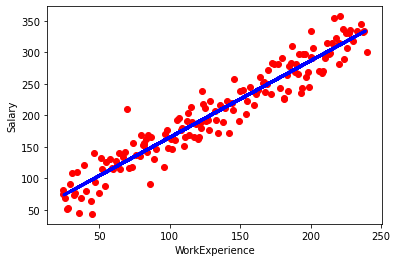

In [27]:
plt.scatter(x_train,y_train,color='r')
plt.plot(x_test['WorkExperience'],predictions,color='blue',linewidth=3)
plt.xlabel('WorkExperience')
plt.ylabel('Salary')
plt.show()

In [28]:
pred_new=result.predict([[100]]) 
pred_new

C:\Users\MEGHA BALAKRISHNAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([164.99361098])

In [29]:
pred_new=result.predict([[200]]) 
pred_new

C:\Users\MEGHA BALAKRISHNAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([286.6313915])

In [30]:
pred_new=result.predict([[300]]) 
pred_new

C:\Users\MEGHA BALAKRISHNAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([408.26917203])

In [31]:
pred_new=result.predict([[400]]) 
pred_new

C:\Users\MEGHA BALAKRISHNAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([529.90695255])

In [32]:
pred_new=result.predict([[500]]) 
pred_new

C:\Users\MEGHA BALAKRISHNAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([651.54473307])

In [33]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=100)

In [34]:

print(RegModel)
 
KNN=RegModel.fit(x_train,y_train)
res1=RegModel.score(x_train, y_train)

print("The Training Score of KNN  Regression Model is",res1*100)
prediction=KNN.predict(x_test)


from sklearn.metrics import r2_score
reg_score = r2_score(y_test,prediction)

print("The Testing Score of Linear Regression Model is",reg_score*100)

KNeighborsRegressor(n_neighbors=100)
The Training Score of KNN  Regression Model is 68.5614308546079
The Testing Score of Linear Regression Model is 66.02738606305951
